# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.
C:\Users\percy\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\percy\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\percy\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\percy\anaconda3\envs\te

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-3, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==========

Epoch 47/50
50000/50000 [==============================] - 1s 22us/step - loss: 2.3047 - accuracy: 0.0966 - val_loss: 2.3056 - val_accuracy: 0.1001
Epoch 48/50
50000/50000 [==============================] - 1s 22us/step - loss: 2.3042 - accuracy: 0.0992 - val_loss: 2.3031 - val_accuracy: 0.1001
Epoch 49/50
50000/50000 [==============================] - 1s 22us/step - loss: 2.3042 - accuracy: 0.1003 - val_loss: 2.3031 - val_accuracy: 0.1001
Epoch 50/50
50000/50000 [==============================] - 1s 22us/step - loss: 2.3046 - accuracy: 0.0983 - val_loss: 2.3040 - val_accuracy: 0.1001
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_______________________________

50000/50000 [==============================] - 1s 22us/step - loss: 1.0287 - accuracy: 0.6386 - val_loss: 1.3635 - val_accuracy: 0.5280
Epoch 45/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.0150 - accuracy: 0.6414 - val_loss: 1.3361 - val_accuracy: 0.5328
Epoch 46/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.0216 - accuracy: 0.6377 - val_loss: 1.3393 - val_accuracy: 0.5347
Epoch 47/50
50000/50000 [==============================] - ETA: 0s - loss: 0.9961 - accuracy: 0.64 - 1s 22us/step - loss: 0.9967 - accuracy: 0.6493 - val_loss: 1.3026 - val_accuracy: 0.5481
Epoch 48/50
50000/50000 [==============================] - 1s 22us/step - loss: 0.9965 - accuracy: 0.6482 - val_loss: 1.3746 - val_accuracy: 0.5260
Epoch 49/50
50000/50000 [==============================] - 1s 22us/step - loss: 0.9839 - accuracy: 0.6513 - val_loss: 1.3396 - val_accuracy: 0.5364
Epoch 50/50
50000/50000 [==============================] - 1s 21us/step - loss: 0.

Epoch 41/50
50000/50000 [==============================] - 1s 21us/step - loss: 1.9380 - accuracy: 0.3198 - val_loss: 1.9336 - val_accuracy: 0.3275
Epoch 42/50
50000/50000 [==============================] - 1s 21us/step - loss: 1.9350 - accuracy: 0.3208 - val_loss: 1.9305 - val_accuracy: 0.3279
Epoch 43/50
50000/50000 [==============================] - 1s 21us/step - loss: 1.9319 - accuracy: 0.3216 - val_loss: 1.9277 - val_accuracy: 0.3289
Epoch 44/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.9290 - accuracy: 0.3231 - val_loss: 1.9248 - val_accuracy: 0.3306
Epoch 45/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.9261 - accuracy: 0.3239 - val_loss: 1.9220 - val_accuracy: 0.3312
Epoch 46/50
50000/50000 [==============================] - ETA: 0s - loss: 1.9235 - accuracy: 0.32 - 1s 22us/step - loss: 1.9233 - accuracy: 0.3254 - val_loss: 1.9192 - val_accuracy: 0.3316
Epoch 47/50
50000/50000 [==============================] - 1s 22us/ste

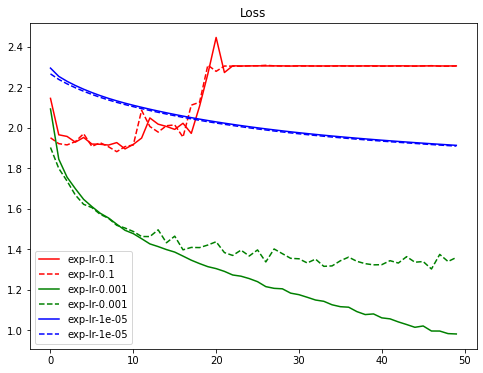

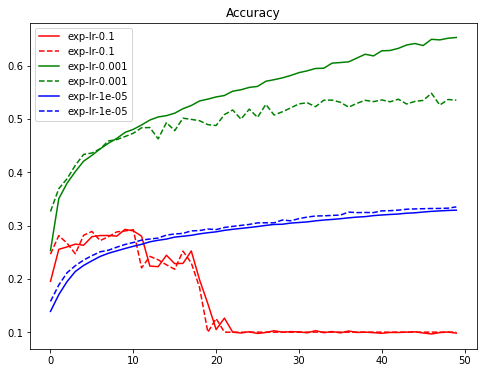

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.3071 - accuracy: 0.1002 - val_loss: 2.3081 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 1s 24us/step - loss: 2.3064 - accuracy: 0.0996 - val_loss: 2.3052 - val_accuracy: 0.1000
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_______________________________________________________________

50000/50000 [==============================] - 1s 24us/step - loss: 0.6882 - accuracy: 0.7538 - val_loss: 1.6815 - val_accuracy: 0.5191
Epoch 48/50
50000/50000 [==============================] - 1s 25us/step - loss: 0.6877 - accuracy: 0.7540 - val_loss: 1.7408 - val_accuracy: 0.5117
Epoch 49/50
50000/50000 [==============================] - ETA: 0s - loss: 0.6648 - accuracy: 0.76 - 1s 24us/step - loss: 0.6658 - accuracy: 0.7618 - val_loss: 1.8545 - val_accuracy: 0.4951
Epoch 50/50
50000/50000 [==============================] - 1s 24us/step - loss: 0.6684 - accuracy: 0.7598 - val_loss: 1.7982 - val_accuracy: 0.5132
Experiment with LR = 0.000010
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_

50000/50000 [==============================] - 1s 24us/step - loss: 1.3939 - accuracy: 0.5187 - val_loss: 1.4575 - val_accuracy: 0.4873
Epoch 45/50
50000/50000 [==============================] - 1s 25us/step - loss: 1.3900 - accuracy: 0.5196 - val_loss: 1.4499 - val_accuracy: 0.4917
Epoch 46/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.3853 - accuracy: 0.5211 - val_loss: 1.4496 - val_accuracy: 0.4912
Epoch 47/50
50000/50000 [==============================] - 1s 25us/step - loss: 1.3804 - accuracy: 0.5240 - val_loss: 1.4479 - val_accuracy: 0.4880
Epoch 48/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.3756 - accuracy: 0.5253 - val_loss: 1.4408 - val_accuracy: 0.4950
Epoch 49/50
50000/50000 [==============================] - 1s 25us/step - loss: 1.3715 - accuracy: 0.5265 - val_loss: 1.4399 - val_accuracy: 0.4972
Epoch 50/50
50000/50000 [==============================] - 1s 25us/step - loss: 1.3667 - accuracy: 0.5278 - val_loss: 1.4375

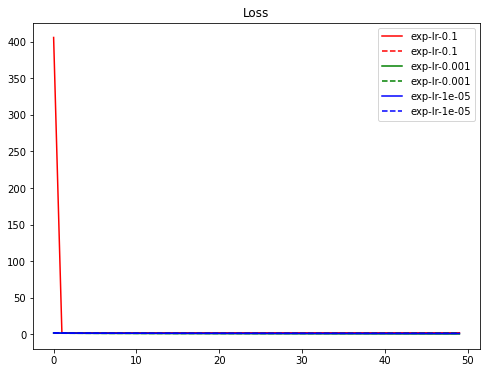

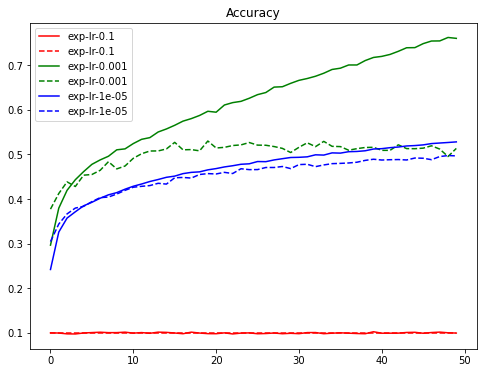

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [11]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(learning_rate=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 1s 23us/step - loss: 2.3080 - accuracy: 0.0970 - val_loss: 2.3329 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 1s 23us/step - loss: 2.3077 - accuracy: 0.1000 - val_loss: 2.3330 - val_accuracy: 0.1000
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_______________________________________________________________

50000/50000 [==============================] - 1s 24us/step - loss: 0.8213 - accuracy: 0.7059 - val_loss: 1.8875 - val_accuracy: 0.4622
Epoch 47/50
50000/50000 [==============================] - 1s 23us/step - loss: 0.8092 - accuracy: 0.7096 - val_loss: 1.9184 - val_accuracy: 0.4959
Epoch 48/50
50000/50000 [==============================] - 1s 24us/step - loss: 0.7972 - accuracy: 0.7127 - val_loss: 1.9604 - val_accuracy: 0.4758
Epoch 49/50
50000/50000 [==============================] - 1s 24us/step - loss: 0.7880 - accuracy: 0.7167 - val_loss: 1.9360 - val_accuracy: 0.4784
Epoch 50/50
50000/50000 [==============================] - 1s 24us/step - loss: 0.7766 - accuracy: 0.7193 - val_loss: 2.0420 - val_accuracy: 0.4879
Experiment with LR = 0.000010
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
___________________________

50000/50000 [==============================] - 1s 24us/step - loss: 1.4401 - accuracy: 0.5000 - val_loss: 1.5031 - val_accuracy: 0.4748
Epoch 44/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.4362 - accuracy: 0.5022 - val_loss: 1.4925 - val_accuracy: 0.4737
Epoch 45/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.4313 - accuracy: 0.5035 - val_loss: 1.4809 - val_accuracy: 0.4829
Epoch 46/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.4269 - accuracy: 0.5056 - val_loss: 1.4761 - val_accuracy: 0.4825
Epoch 47/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.4228 - accuracy: 0.5070 - val_loss: 1.4896 - val_accuracy: 0.4756
Epoch 48/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.4179 - accuracy: 0.5092 - val_loss: 1.4779 - val_accuracy: 0.4784
Epoch 49/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.4139 - accuracy: 0.5101 - val_loss: 1.4838

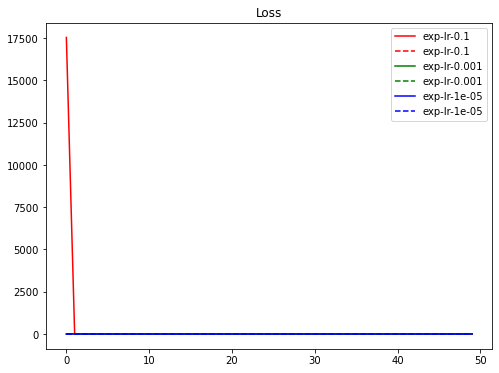

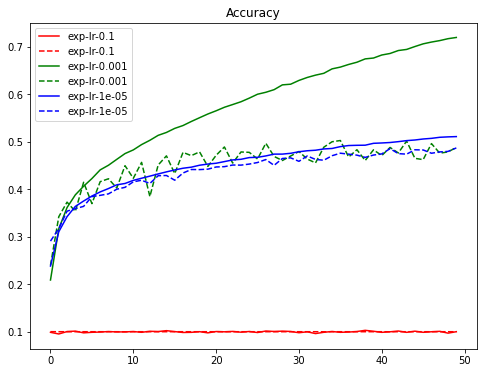

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [14]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(learning_rate=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 1s 23us/step - loss: 1.4299 - accuracy: 0.4871 - val_loss: 1.6179 - val_accuracy: 0.4339
Epoch 49/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.4312 - accuracy: 0.4903 - val_loss: 1.5060 - val_accuracy: 0.4676
Epoch 50/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.4210 - accuracy: 0.4915 - val_loss: 1.5605 - val_accuracy: 0.4519
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
___________________________________________________________

50000/50000 [==============================] - 1s 23us/step - loss: 1.2924 - accuracy: 0.5499 - val_loss: 1.3929 - val_accuracy: 0.5085
Epoch 46/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.2878 - accuracy: 0.5529 - val_loss: 1.4000 - val_accuracy: 0.5049
Epoch 47/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.2843 - accuracy: 0.5530 - val_loss: 1.3940 - val_accuracy: 0.5036
Epoch 48/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.2798 - accuracy: 0.5556 - val_loss: 1.3982 - val_accuracy: 0.5036
Epoch 49/50
50000/50000 [==============================] - 1s 24us/step - loss: 1.2759 - accuracy: 0.5556 - val_loss: 1.3817 - val_accuracy: 0.5081
Epoch 50/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.2723 - accuracy: 0.5576 - val_loss: 1.3852 - val_accuracy: 0.5067
Experiment with LR = 0.000010
Model: "model_1"
_________________________________________________________________
Layer (type

50000/50000 [==============================] - 1s 23us/step - loss: 1.9844 - accuracy: 0.3105 - val_loss: 1.9825 - val_accuracy: 0.3096
Epoch 43/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.9826 - accuracy: 0.3111 - val_loss: 1.9808 - val_accuracy: 0.3100
Epoch 44/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.9808 - accuracy: 0.3123 - val_loss: 1.9790 - val_accuracy: 0.3108
Epoch 45/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.9791 - accuracy: 0.3121 - val_loss: 1.9774 - val_accuracy: 0.3111
Epoch 46/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.9774 - accuracy: 0.3129 - val_loss: 1.9757 - val_accuracy: 0.3116
Epoch 47/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.9758 - accuracy: 0.3137 - val_loss: 1.9741 - val_accuracy: 0.3115
Epoch 48/50
50000/50000 [==============================] - 1s 23us/step - loss: 1.9742 - accuracy: 0.3136 - val_loss: 1.9726

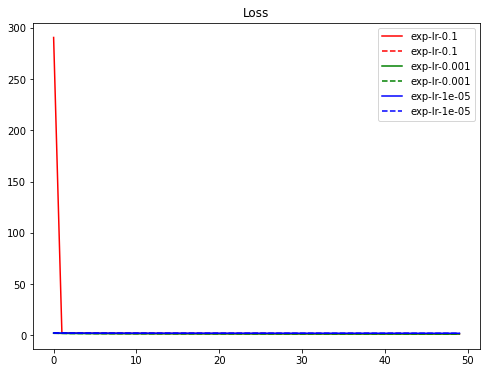

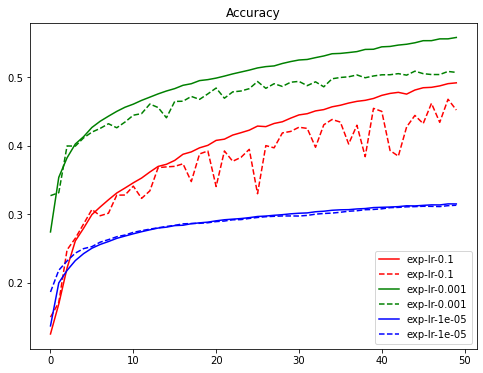

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()